In [41]:
#import libraries and api keys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import requests
import json

#from keys.gitignore import 
#from keys import 

In [42]:
#load in csv files for each city
cle_file = "Zipcodes/Cleveland.csv"
cle_df = pd.read_csv(cle_file)
cle_df["zip_code"] = cle_df["zip_code"].astype(str)
cle_df.head()

,zip_code,distance,city,state
0,44286,19.907,Richfield,OH
1,44233,18.982,Hinckley,OH
2,44141,15.561,Brecksville,OH
3,44136,15.988,Strongsville,OH
4,44087,18.933,Twinsburg,OH


In [43]:
#https://www.udsmapper.org/zcta-crosswalk.cfm
#load in csv for ZTAC info
zip_file = "Zipcodes/zip_to_zcta_2018.csv"
zip_df = pd.read_csv(zip_file)
zip_df.head()

,zip_code,zcta
0,501,11742
1,544,11742
2,601,601
3,602,602
4,603,603


In [44]:
#convert zip code to string to add back zeroes
zip_df["zip_code"] = zip_df["zip_code"].astype(str)

for index, row in zip_df.iterrows():
    
    length = len(zip_df.at[index, "zip_code"])
    ZIP = zip_df.at[index, "zip_code"]
    
    if (5 - length) == 2:
        new_zip = "00" + ZIP
        zip_df.at[index, "zip_code"] = new_zip
    else:
        if (5 - length) == 1:
            new_zip = "0" + ZIP
            zip_df.at[index, "zip_code"] = new_zip

#convert zcta to string to add back zeroes
zip_df["zcta"] = zip_df["zcta"].astype(str)

for index, row in zip_df.iterrows():
    
    length = len(zip_df.at[index, "zcta"])
    ZCTA = zip_df.at[index, "zcta"]
    
    if (5 - length) == 2:
        new_zcta = "00" + ZCTA
        zip_df.at[index, "zcta"] = new_zcta
    else:
        if (5 - length) == 1:
            new_zcta = "0" + ZCTA
            zip_df.at[index, "zcta"] = new_zcta
            
zip_df.head()

,zip_code,zcta
0,00501,11742
1,00544,11742
2,00601,00601
3,00602,00602
4,00603,00603


In [45]:
#join ZCTA data to city df
cle_merge = pd.merge(cle_df, zip_df, on="zip_code")
cle_merge.head()

,zip_code,distance,city,state,zcta
0,44286,19.907,Richfield,OH,44286
1,44233,18.982,Hinckley,OH,44233
2,44141,15.561,Brecksville,OH,44141
3,44136,15.988,Strongsville,OH,44136
4,44087,18.933,Twinsburg,OH,44087


In [46]:
age_file = "Zipcodes/DEC_10_SF1_QTP1_with_ann.csv"
age_df = pd.read_csv(age_file)

#convert zcta to string to add back zeroes
age_df["zcta"] = age_df["zcta"].astype(str)

for index, row in age_df.iterrows():
    
    length = len(age_df.at[index, "zcta"])
    ZCTA2 = age_df.at[index, "zcta"]
    
    if (5 - length) == 2:
        new_zcta2 = "00" + ZCTA2
        age_df.at[index, "zcta"] = new_zcta2
    else:
        if (5 - length) == 1:
            new_zcta2 = "0" + ZCTA2
            age_df.at[index, "zcta"] = new_zcta2

age_df.head()

,zcta,median age
0,00601,35.9
1,00602,37.5
2,00603,38.2
3,00606,36.2
4,00610,38.1


In [47]:
cle_final = pd.merge(cle_merge, age_df, on="zcta")
cle_final.head()

,zip_code,distance,city,state,zcta,median age
0,44286,19.907,Richfield,OH,44286,47.4
1,44233,18.982,Hinckley,OH,44233,45.3
2,44141,15.561,Brecksville,OH,44141,47.3
3,44136,15.988,Strongsville,OH,44136,43.5
4,44087,18.933,Twinsburg,OH,44087,40.8


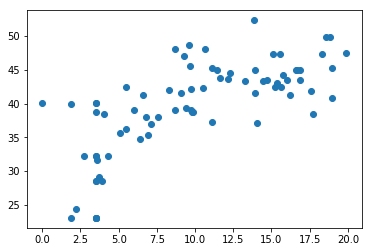

In [48]:
plt.scatter(cle_final['distance'],cle_final['median age'])

In [49]:
df_1 = cle_final
df_1 = df_1.drop(47)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(df_1['distance'],df_1['median age'],test_size= 0.2, random_state = 1)

# Model to fit a linear line
model = LinearRegression()
# #  from sklearn.linear_model import Ridge
# model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
# basis_plot(model, title='Ridge Regression')

model.fit((X_train[:, np.newaxis]),y_train)
xfit = np.linspace(0, 25,20 )
yfit = model.predict(xfit[:, np.newaxis])
print(f'model coefficient: {int(model.coef_)}')
print(f'model intercept: {int(model.intercept_)}')
y_predict = model.predict(X_test[:, np.newaxis])
print (f'R_squared is: {r2_score(y_test,y_predict)}')

model coefficient: 0
model intercept: 30
R_squared is: 0.4476462490698395


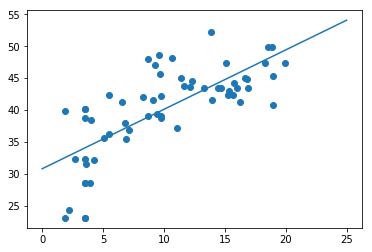

In [51]:
plt.scatter(X_train,y_train)
plt.plot(xfit, yfit);

In [52]:
model_2 = make_pipeline(PolynomialFeatures(2),LinearRegression())
model_2.fit((X_train[:, np.newaxis]),y_train)
xfit = np.linspace(0, 20,10 )
yfit = model_2.predict(xfit[:, np.newaxis])
print(model_2.steps[1][1].coef_)
print(model_2.steps[1][1].intercept_)
# print(f'model coefficient: {int(model_2.coef_)}')
# print(f'model intercept: {int(model_2.intercept_)}')
y_predict = model_2.predict(X_test[:, np.newaxis])
print (f'R_squared is: {r2_score(y_test,y_predict)}')

[ 0.          2.58606493 -0.07963834]
24.53487140183112
R_squared is: 0.5731181653756456


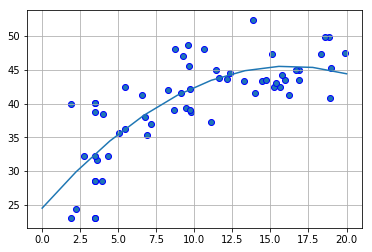

In [62]:
plt.scatter(X_train,y_train,edgecolors='b')
plt.plot(xfit, yfit);
plt.grid()
plt.figure(figsize=(200,111))

In [16]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# diabetes = datasets.load_diabetes()
X = cle_final['distance']
X_2 = X**2
X_1=pd.DataFrame([X]).T
X_1 ['distance_2'] = X_1['distance']**2
# X_1 ['distance_3'] = X_1['distance']**3
y = pd.DataFrame(cle_final['median age'])
X2 = sm.add_constant(X_1)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


C:\Users\holozadah\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:             median age   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     47.85
Date:                Fri, 14 Sep 2018   Prob (F-statistic):           4.03e-14
Time:                        20:26:44   Log-Likelihood:                -230.23
No. Observations:                  78   AIC:                             466.5
Df Residuals:                      75   BIC:                             473.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.7891      1.930     13.366      0.0

In [17]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
cle_1 = std.fit_transform(cle_final[['distance','median age']])

In [19]:
X = cle_1[0]
X_2 = X**2
X_1=pd.DataFrame([X]).T
X_1 ['distance_2'] = X_1[0]**2
# X_1 ['distance_3'] = X_1['distance']**3
y = pd.DataFrame(cle_1[1])
X2 = sm.add_constant(X_1)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Fri, 14 Sep 2018   Prob (F-statistic):                nan
Time:                        20:27:24   Log-Likelihood:                 65.972
No. Observations:                   2   AIC:                            -127.9
Df Residuals:                       0   BIC:                            -130.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634        inf          0        n

C:\Users\holozadah\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\holozadah\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1392: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
C:\Users\holozadah\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1392: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
C:\Users\holozadah\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1400: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
C:\Users\holozadah\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1353: RuntimeWarning: div

In [20]:
cle_1 = pd.DataFrame(cle_1)
X = cle_1[0]
X_2 = X**2
X_1=pd.DataFrame([X]).T
X_1 ['distance_2'] = X_1[0]**2
# X_1 ['distance_3'] = X_1['distance']**3
y = pd.DataFrame(cle_1[1])
X2 = sm.add_constant(X_1)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      1   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     47.85
Date:                Fri, 14 Sep 2018   Prob (F-statistic):           4.03e-14
Time:                        20:28:14   Log-Likelihood:                -78.602
No. Observations:                  78   AIC:                             163.2
Df Residuals:                      75   BIC:                             170.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2702      0.118      2.288      0.0

#  Improving the accuracy by Normalizing the data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(cle_1[0],cle_1[1],test_size= 0.2, random_state = 1)
model_2 = make_pipeline(PolynomialFeatures(2),LinearRegression())
model_2.fit((X_train[:, np.newaxis]),y_train)
xfit = np.linspace(-2,2,10 )
yfit = model_2.predict(xfit[:, np.newaxis])
print(model_2.steps[1][1].coef_)
print(model_2.steps[1][1].intercept_)
# print(f'model coefficient: {int(model_2.coef_)}')
# print(f'model intercept: {int(model_2.intercept_)}')
y_predict = model_2.predict(X_test[:, np.newaxis])
print (f'R_squared is: {r2_score(y_test,y_predict)}')

[ 0.          0.72513238 -0.23636949]
0.28520813973867365
R_squared is: 0.4778619927183636


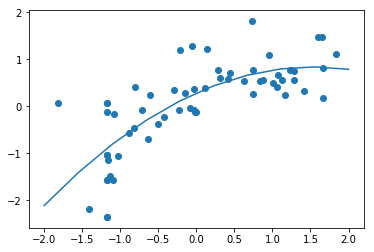

In [22]:
plt.scatter(X_train,y_train)
plt.plot(xfit, yfit);